# **Linear Regression Analysis: Automobile Datasets**

Marquez, Keith Leigh Zhen R.

# Data Wrangling:

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
auto = pd.concat([X,y], axis=1)
auto

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [ ]:
auto.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object

Identify missing value

In [ ]:
auto_null=auto.isnull().sum()
auto_null

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64

Checking for duplicates

In [ ]:
# Check for duplicates
duplicate_rows = auto.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


Summary of the data

In [ ]:
auto.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


Fill in mssing data

In [ ]:
auto['price'].fillna(auto['price'].median(), inplace=True)
auto['peak-rpm'].fillna(auto['peak-rpm'].median(), inplace=True)
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)
auto['stroke'].fillna(auto['stroke'].median(), inplace=True)
auto['bore'].fillna(auto['bore'].median(), inplace=True)
auto['num-of-doors'].fillna(auto['num-of-doors'].mode()[0], inplace=True)
auto['normalized-losses'].fillna(auto['normalized-losses'].median(), inplace=True)
auto

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,115.0,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,115.0,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,115.0,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


Checking for null

In [ ]:
auto.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

Convert/change data types

In [ ]:
auto['num-of-doors'] = auto['num-of-doors'].astype(int)
auto.dtypes

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors           int64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
symboling              int64
dtype: object

# EDA (exploratory data analysis):

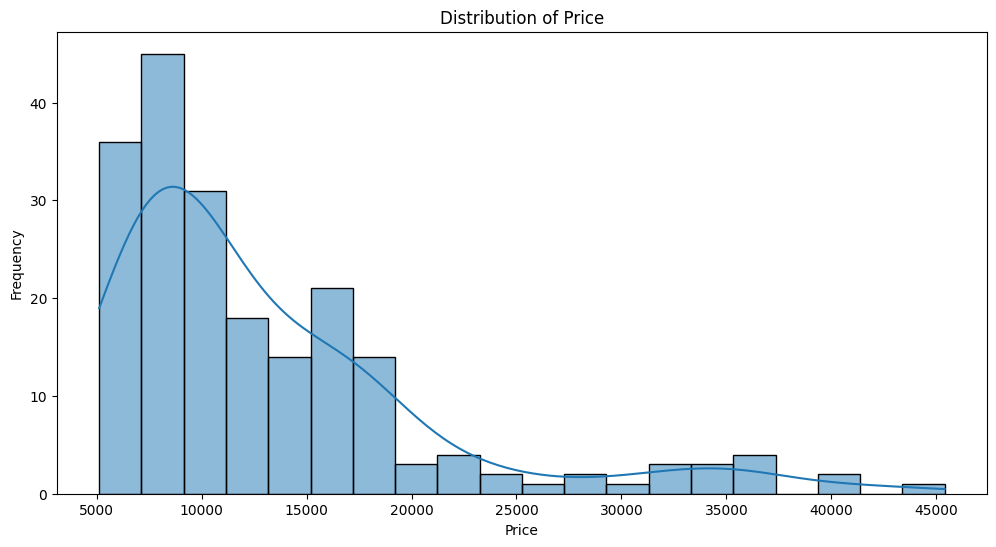

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(auto['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The graph shows a Distribution of Price with an overlaid line graph. It reveals that the majority of data points cluster around the 10,000 mark, indicating it's the most common price. Beyond this point, there's a decrease in frequency, suggesting higher-priced items are less common. The downward trend of the line graph reinforces this, indicating fewer items as prices rise. This implies a market where lower-priced items dominate and consumers may be sensitive to price increases.

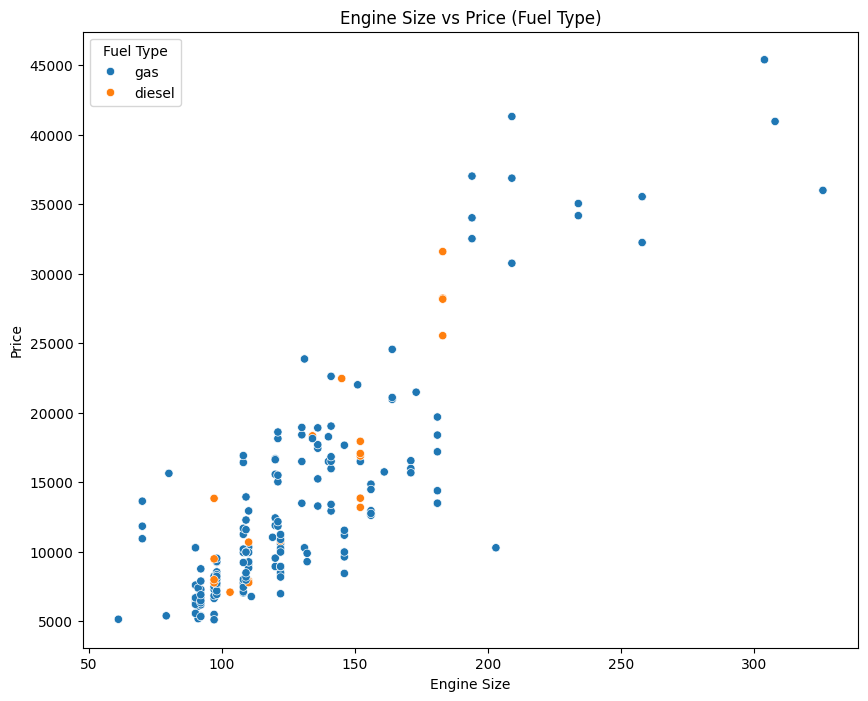

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=auto, x='engine-size', y='price', hue='fuel-type')
plt.title('Engine Size vs Price (Fuel Type)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

The graph displays a scatter plot comparing engine size to price, with distinctions made for gas and diesel fuel types. Gas vehicles (depicted in blue) outnumber diesel vehicles (depicted in orange) and generally offer a wider range of engine sizes and prices, making them more affordable, especially for smaller engines. Diesel vehicles tend to have mid-range engine sizes and higher prices. This suggests that consumers seeking budget-friendly options may prefer gas vehicles with smaller engines, while diesel vehicles, despite their higher cost, may offer benefits justifying the expense, particularly for mid-range engine sizes. Overall, the trend indicates that larger engine sizes typically correlate with higher prices for both fuel types, though there are exceptions, especially among gas vehicles. This implies that factors beyond engine size, such as brand, features, or market demand, may also influence pricing.

<ipython-input-20-5742f86d257d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel-type', y='price', data=auto, palette='Set2')


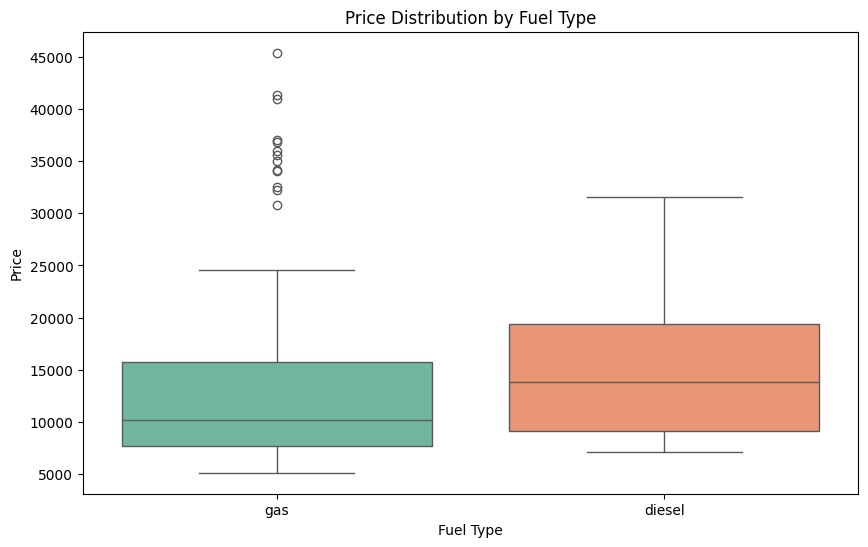

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel-type', y='price', data=auto, palette='Set2')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

The graph compares vehicle prices by fuel type, showing gas vehicles have a median price around 10,000, with an interquartile range (IQR) of 7,500 to 12,500 and outliers reaching 45,000. Diesel vehicles have a higher median price of approximately 17,500, with a broader IQR (15,000 to 20,000) indicating greater price variance. Overall, diesel cars are generally pricier upfront, while gas cars exhibit more variability, occasionally surpassing diesel prices due to specific models or features. Gas vehicles include many high-priced outliers, while diesel prices are more consistently higher.

<ipython-input-19-6b7cb4b082c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='make', data=auto, order=auto['make'].value_counts().index, palette='rainbow')


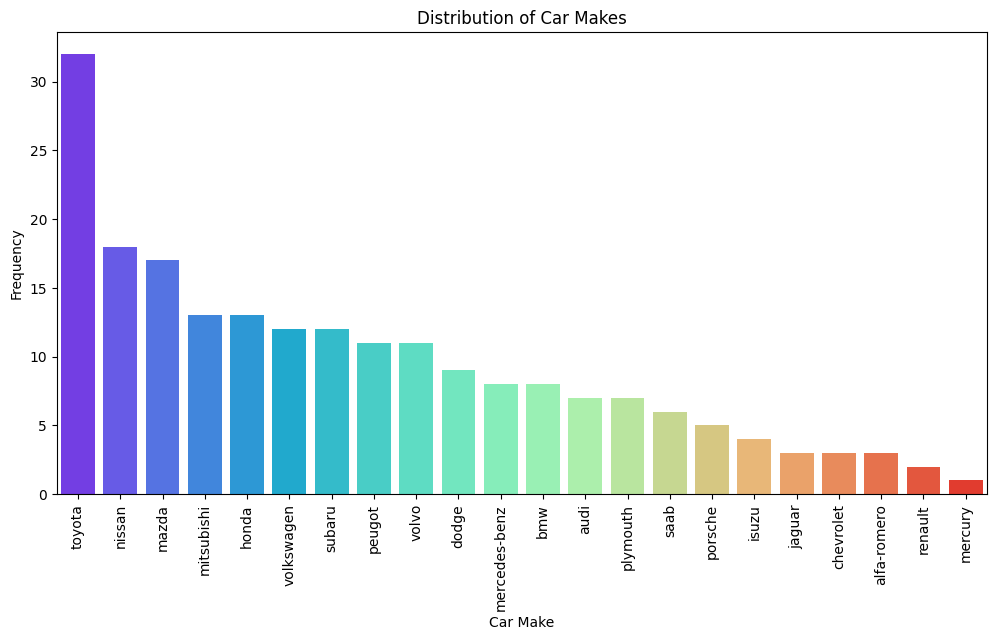

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='make', data=auto, order=auto['make'].value_counts().index, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Distribution of Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.show()

The graph illustrates the distribution of car makes, revealing Toyota's dominance with over 30% frequency, followed by Nissan and Mazda. Luxury brands like Mercedes-Benz, BMW, and Audi hold moderate frequencies, while less common makes such as Jaguar, Alfa Romeo, Renault, and Mercury have limited popularity. This indicates Toyota's significant lead in the market, with other brands competing in a diverse but competitive landscape.

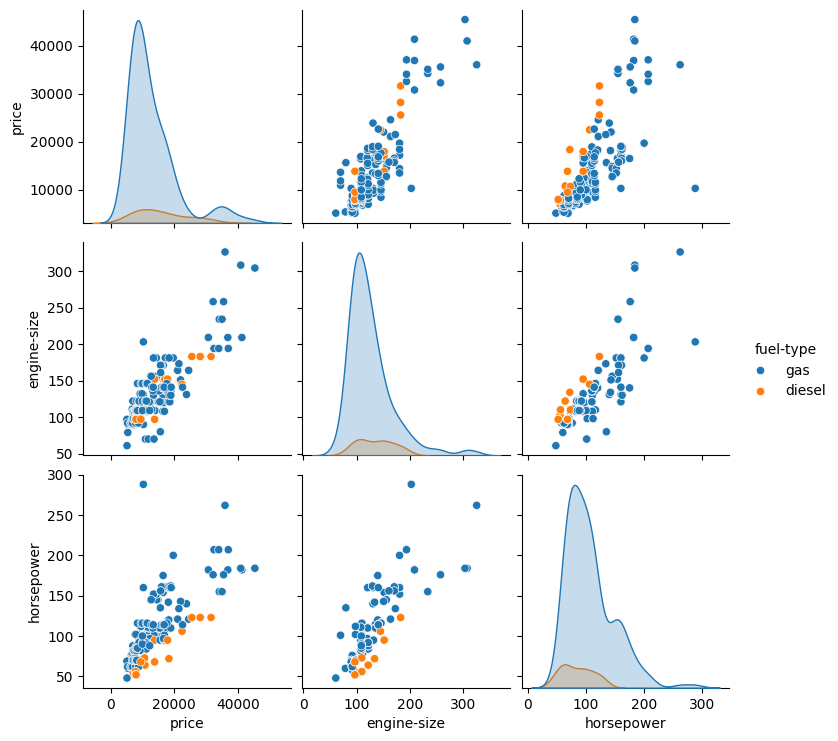

In [ ]:
sns.pairplot(auto[['price', 'engine-size', 'horsepower', 'fuel-type']], hue='fuel-type')
plt.show()

This shows that cars with larger engines and higher horsepower tend to command higher prices, particularly evident in diesel cars. While there's a clear positive correlation between horsepower and price, the link between engine size and horsepower is less distinct. Overall, the visual representations highlight the trend of higher specifications correlating with higher prices, emphasizing the importance of considering fuel type when analyzing these relationships.

# Linear Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Selecting predictor variables and target variable

In [ ]:
predictors = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']
target = 'price'

Splitting the dataset into training and testing sets

In [ ]:
X = auto[predictors]
y = auto[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the linear regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

Evaluate the model

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 17324890.71559912
R-squared: 0.7791415425821901


# Predicted vs. Actual prices

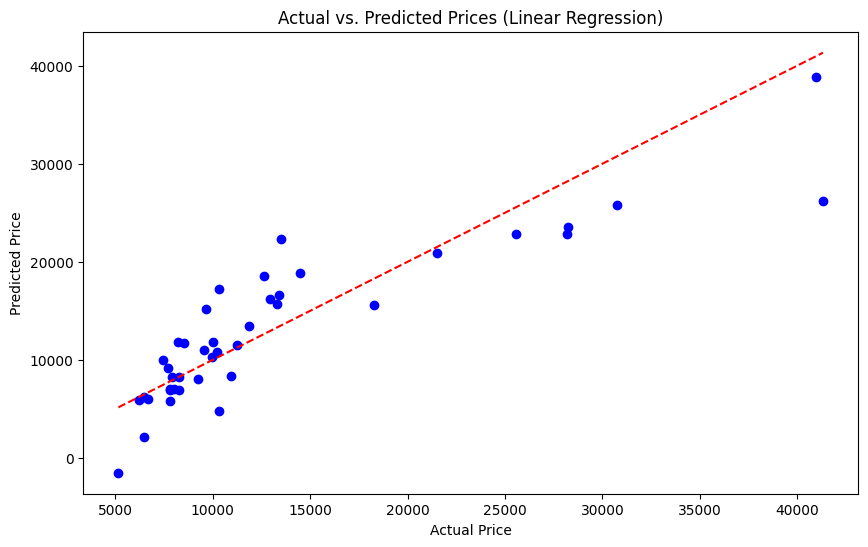

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

The scatter plot graph compares actual prices to predicted prices using linear regression. Blue dots represent data points, showing the relationship between actual and predicted prices. A red dashed line indicates the linear regression model trend. Most data points cluster at lower price ranges, with axes ranging from 0 to 40,000. There's a **positive correlation** between actual and predicted prices, suggesting an increase in one leads to an increase in the other. The model is generally accurate, but outliers exist where predictions significantly differ from actual values. Refinement is suggested to improve accuracy, especially for outliers.








In [ ]:
auto.to_csv('CleanedData_Automobile.csv', index=False)